In [ ]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/Vehicle_Insurance.csv")

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298747,298748,Female,40,1,41.0,0,1-2 Year,Yes,23749.0,26.0,233.0,0.0
298748,298749,Male,24,1,28.0,1,< 1 Year,No,34259.0,152.0,166.0,0.0
298749,298750,Female,24,1,29.0,1,< 1 Year,No,42036.0,152.0,83.0,0.0
298750,298751,Female,22,1,21.0,1,< 1 Year,No,44554.0,152.0,224.0,0.0


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,298752.000000,298752.000000,298752.000000,298752.000000,298752.000000,298752.000000,298752.000000,298751.000000,298751.000000
mean,149376.500000,38.815235,0.997858,26.383552,0.457828,30537.424633,112.116716,154.336260,0.122999
std,86242.418148,15.494707,0.046235,13.231482,0.498219,17247.686932,54.142181,83.648025,0.328436
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,74688.750000,25.000000,1.000000,15.000000,0.000000,24391.000000,29.000000,82.000000,0.000000
50%,149376.500000,36.000000,1.000000,28.000000,0.000000,31645.000000,133.000000,154.000000,0.000000
75%,224064.250000,49.000000,1.000000,35.000000,1.000000,39361.250000,152.000000,227.000000,0.000000
max,298752.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298752 entries, 0 to 298751
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    298752 non-null  int64  
 1   Gender                298752 non-null  object 
 2   Age                   298752 non-null  int64  
 3   Driving_License       298752 non-null  int64  
 4   Region_Code           298752 non-null  float64
 5   Previously_Insured    298752 non-null  int64  
 6   Vehicle_Age           298752 non-null  object 
 7   Vehicle_Damage        298752 non-null  object 
 8   Annual_Premium        298752 non-null  float64
 9   Policy_Sales_Channel  298752 non-null  float64
 10  Vintage               298751 non-null  float64
 11  Response              298751 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 27.4+ MB


In [ ]:
df.nunique()

,0
id,298752
Gender,2
Age,66
Driving_License,2
Region_Code,53
Previously_Insured,2
Vehicle_Age,3
Vehicle_Damage,2
Annual_Premium,46087
Policy_Sales_Channel,153


In [ ]:
df["Age"].min()

20

In [ ]:
df["Age"].max()

85

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
def find_anomalies(data):
    anomalies = []
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    anomaly_cut_off = random_data_std * 3
    lower_limit  = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

<Axes: xlabel='Vintage', ylabel='Density'>

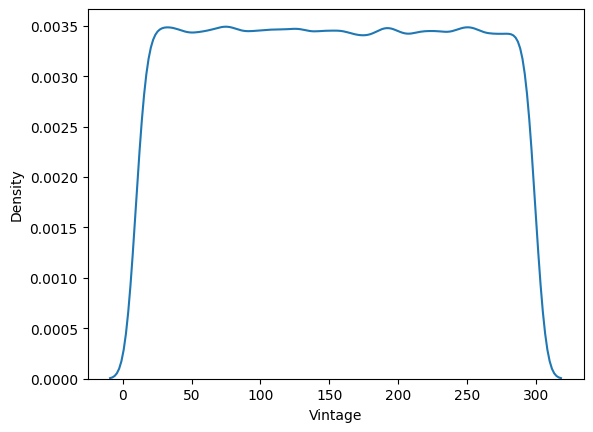

In [ ]:
sns.kdeplot(df['Vintage'])

In [ ]:
list1 = find_anomalies(df['Annual_Premium'])

In [ ]:
len(list1)

2083

In [ ]:
df.Annual_Premium.skew()

np.float64(1.7660872148961309)

<Axes: xlabel='Annual_Premium', ylabel='Density'>

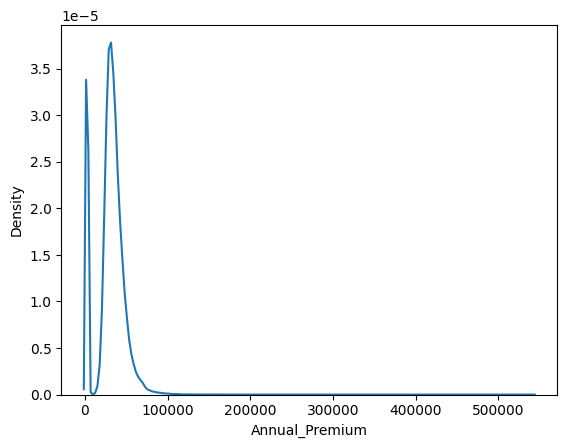

In [ ]:
sns.kdeplot(df["Annual_Premium"])

In [ ]:
df['Annual_Premium'] = np.log(df["Annual_Premium"])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

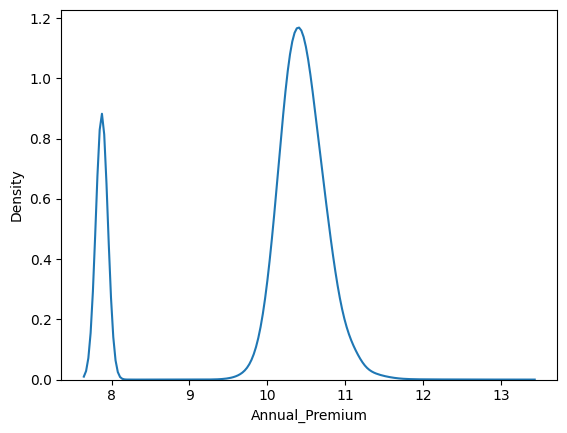

In [ ]:
sns.kdeplot(df['Annual_Premium'])

<Axes: ylabel='Annual_Premium'>

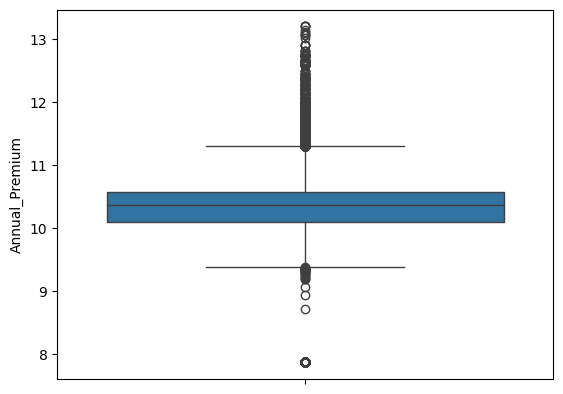

In [ ]:
sns.boxplot(df['Annual_Premium'])

In [ ]:
df_numeric = df.select_dtypes(include = ["int64","Float64"])

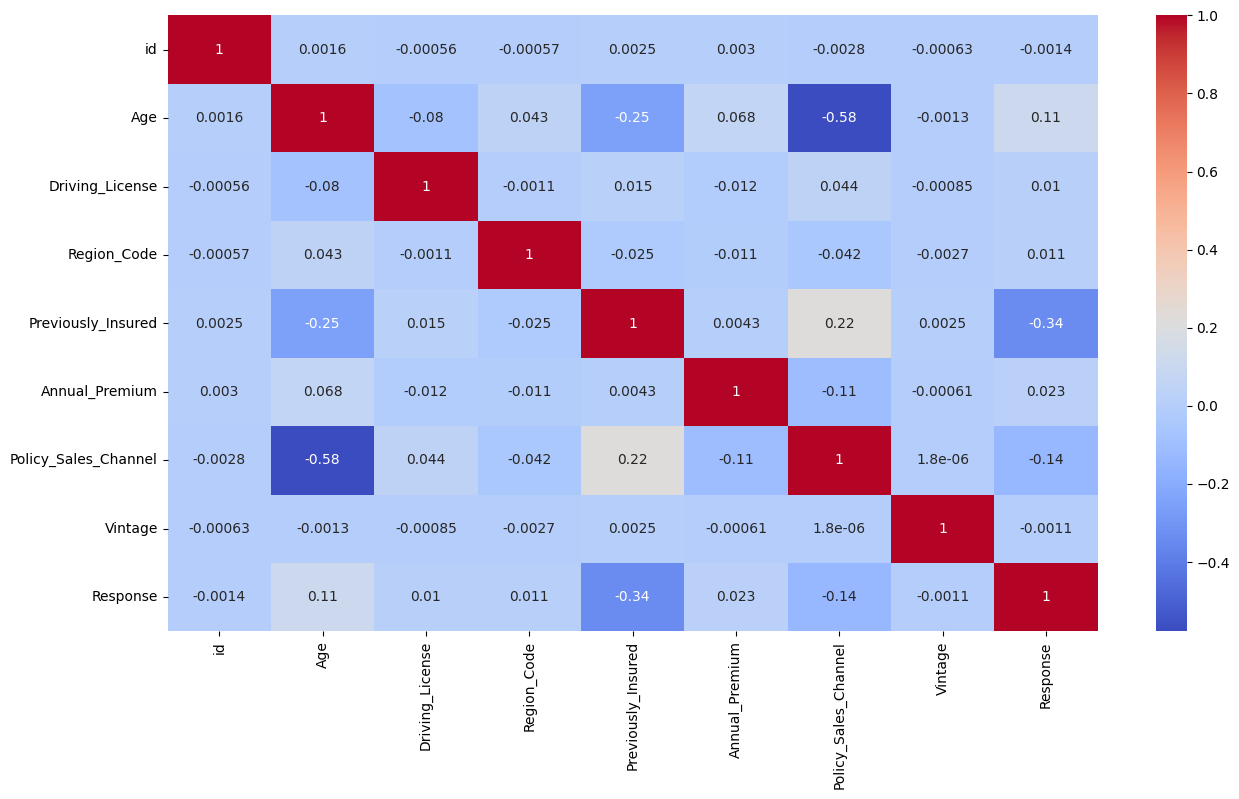

In [ ]:
plt.figure(figsize=(15, 8))
fig = sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Age', ylabel='Response'>

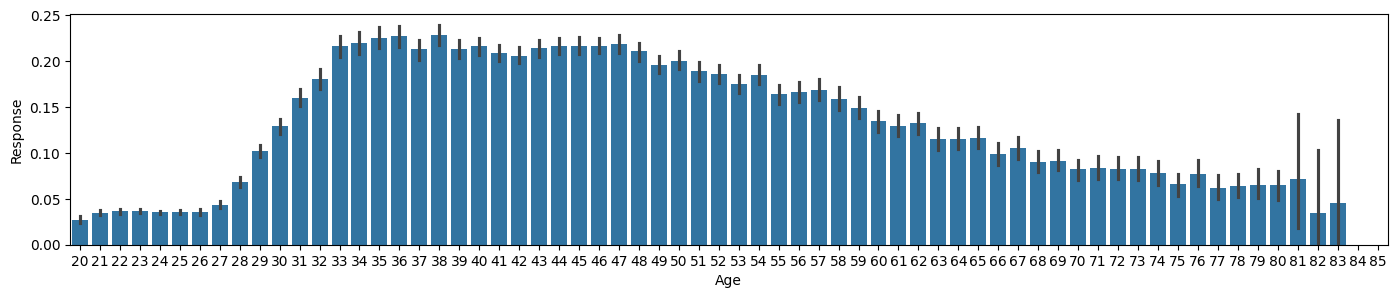

In [ ]:
plt.figure(figsize=(17,3))
sns.barplot(x='Age', y='Response', data=df)

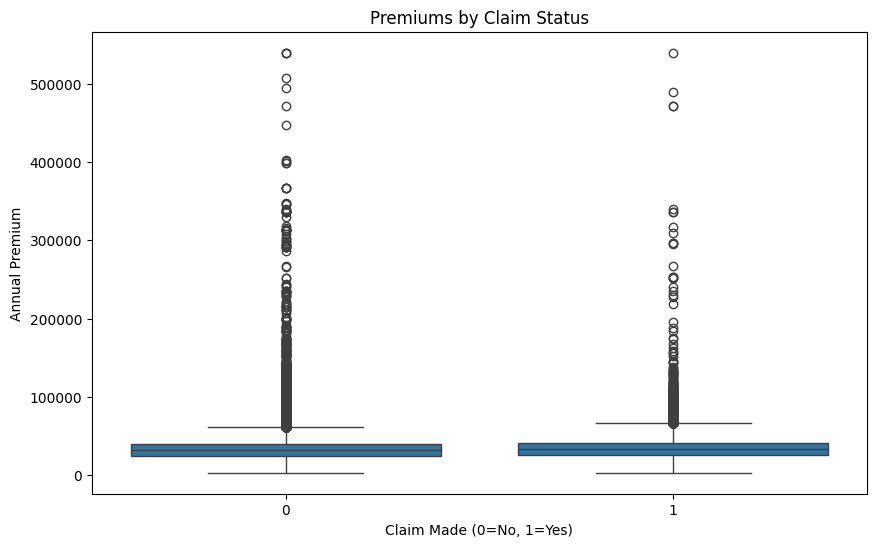

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Premiums by Claim Status')
plt.xlabel('Claim Made (0=No, 1=Yes)')
plt.ylabel('Annual Premium')
plt.show()

<Axes: xlabel='Previously_Insured', ylabel='count'>

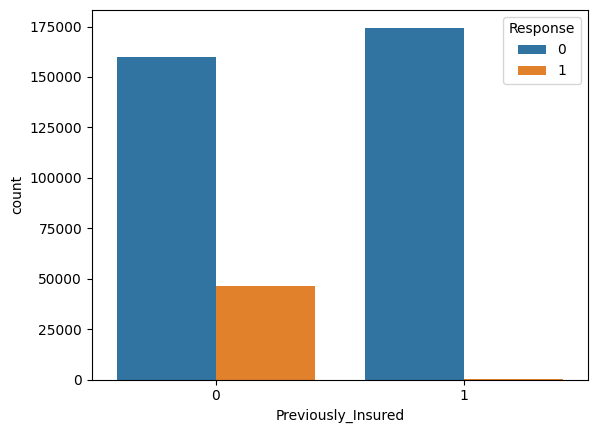

In [ ]:
sns.countplot(x='Previously_Insured', hue='Response', data=df)

<Axes: xlabel='Driving_License', ylabel='count'>

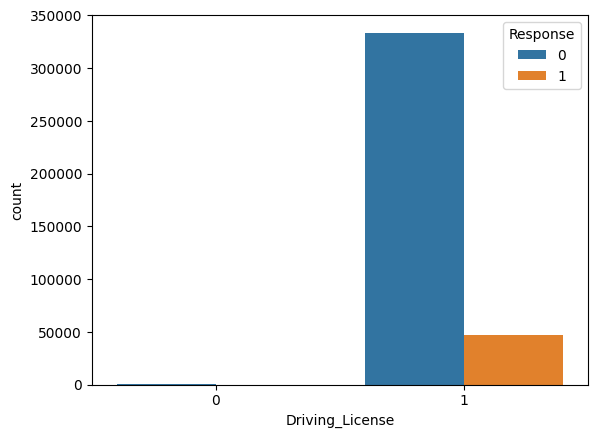

In [ ]:
sns.countplot(x='Driving_License', hue='Response', data=df)

<Axes: xlabel='Vehicle_Age', ylabel='count'>

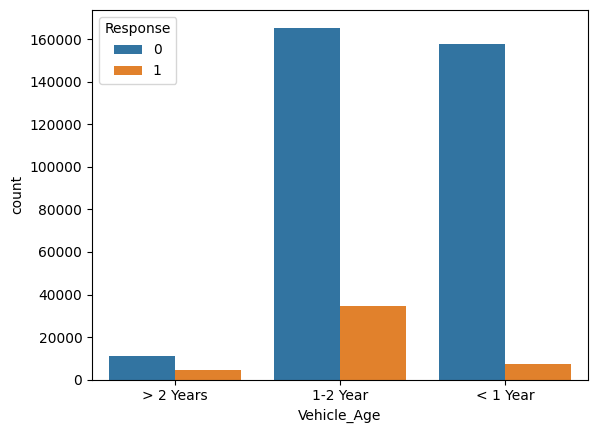

In [ ]:
sns.countplot(x='Vehicle_Age', hue='Response', data=df)

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

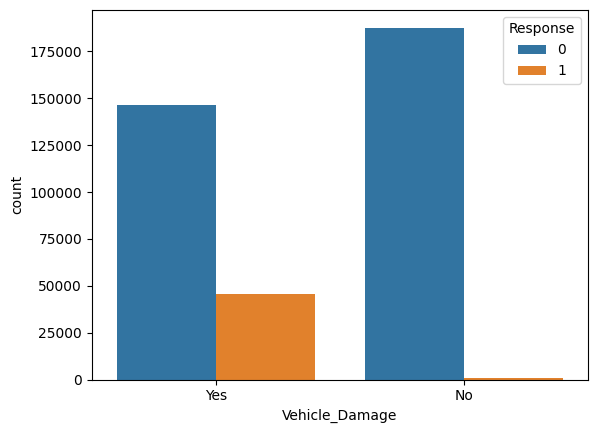

In [ ]:
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)

<Axes: xlabel='Annual_Premium', ylabel='Age'>

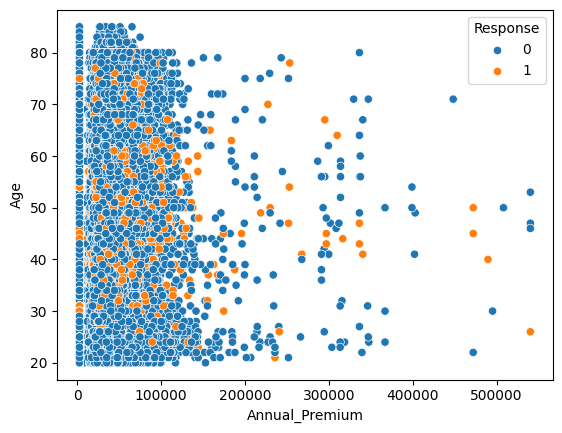

In [ ]:
sns.scatterplot(x='Annual_Premium', y='Age', hue='Response', data=df)

<Axes: xlabel='Region_Code', ylabel='count'>

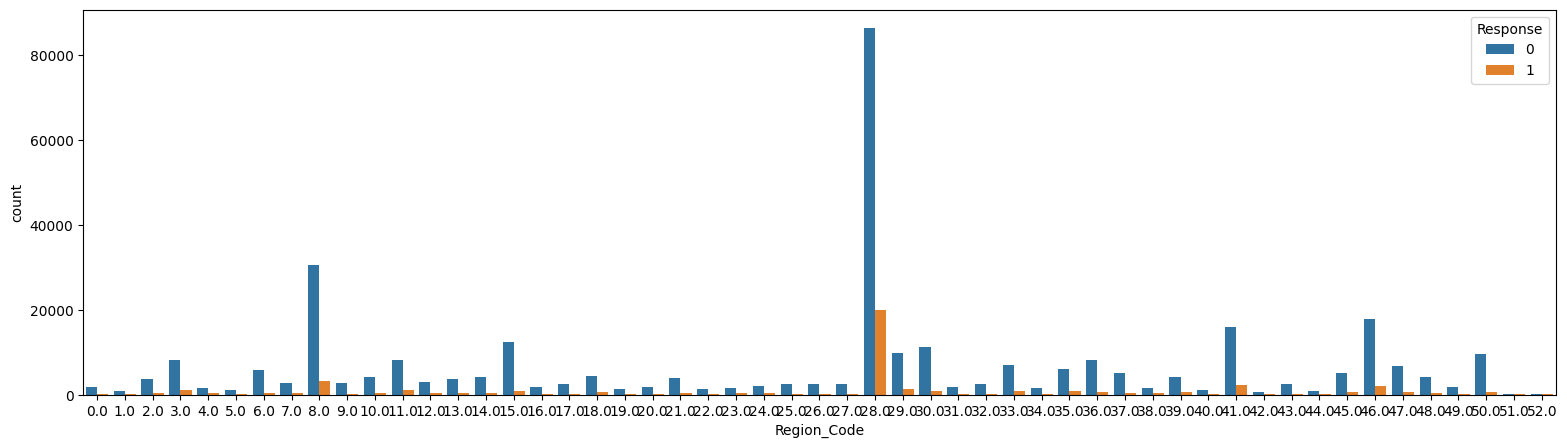

In [ ]:
plt.figure(figsize=(19,5))
sns.countplot(x='Region_Code', hue='Response', data=df)

In [ ]:
df_1 = df.groupby("Gender")["Response"].mean().reset_index().rename(columns={"Response":"Response_Percentage"})
df_1["Response_Percentage"] *=100
df_1

,Gender,Response_Percentage
0,Female,10.445184
1,Male,13.876469


<Axes: xlabel='Gender', ylabel='Response_Percentage'>

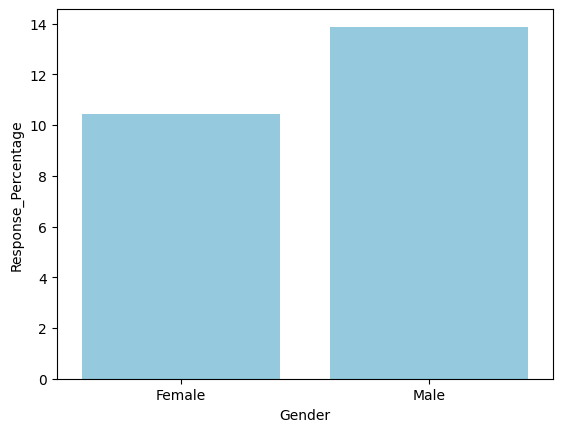

In [ ]:
sns.barplot(x='Gender', y='Response_Percentage', data=df_1, color='skyblue')

/tmp/ipython-input-22-3393193316.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  sns.countplot(x="Vehicle_Age",hue="Response",data=df,color="pink")


<Axes: xlabel='Vehicle_Age', ylabel='count'>

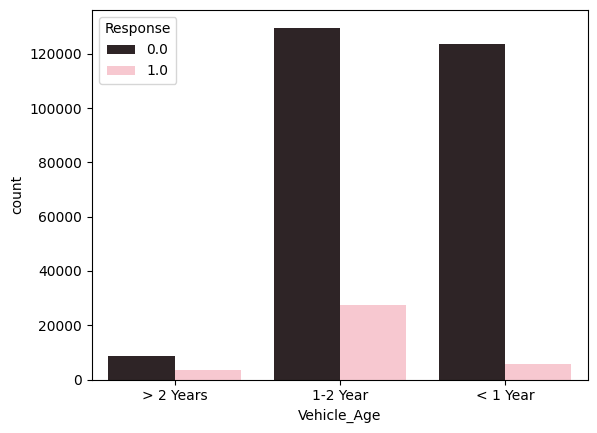

In [ ]:
sns.countplot(x="Vehicle_Age",hue="Response",data=df,color="pink")

In [ ]:
region_response = (
    df.groupby('Region_Code')['Response']
    .mean()
    .reset_index()
    .rename(columns={'Response': 'Response_Rate'})
)
region_response['Response_Rate'] *= 100

In [ ]:
fig = px.bar(
    region_response,
    x='Region_Code',
    y='Response_Rate',
    color='Response_Rate',
    color_continuous_scale='viridis')
fig.show()

<BarContainer object of 153 artists>

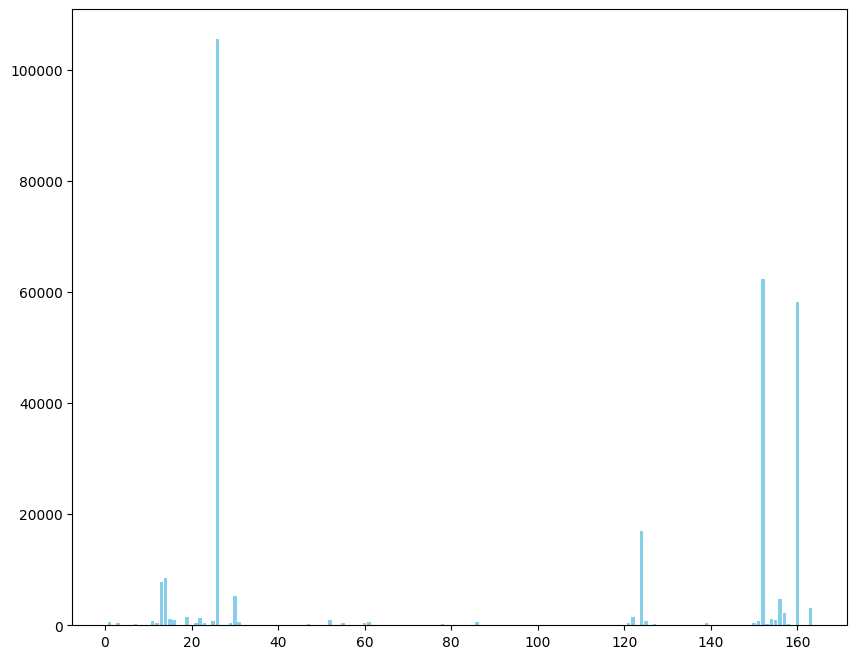

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(df['Policy_Sales_Channel'].unique(), df['Policy_Sales_Channel'].value_counts(), color='skyblue')

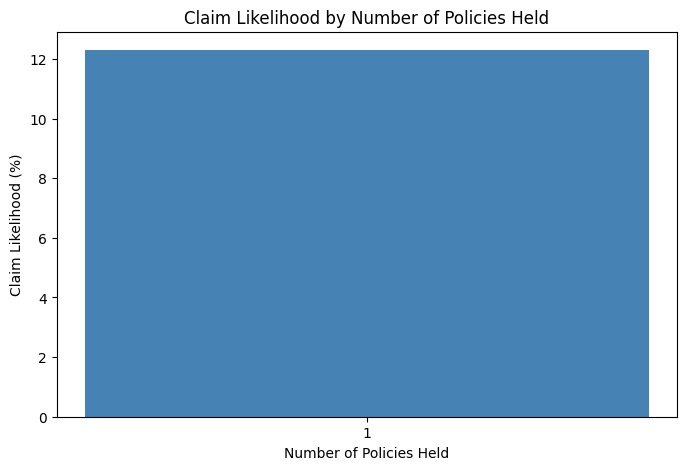

In [ ]:
customer_policy_counts = df.groupby('id').size().reset_index(name='Num_Policies')
df_with_counts = df.merge(customer_policy_counts, on='id')
claim_any = df.groupby('id')['Response'].max().reset_index(name='Any_Claim')
claim_distribution = customer_policy_counts.merge(claim_any, on='id')
summary = claim_distribution.groupby('Num_Policies')['Any_Claim'].mean().reset_index()
summary['Claim_Likelihood_%'] = summary['Any_Claim'] * 100
plt.figure(figsize=(8,5))
plt.bar(summary['Num_Policies'].astype(str), summary['Claim_Likelihood_%'], color='steelblue')
plt.xlabel('Number of Policies Held')
plt.ylabel('Claim Likelihood (%)')
plt.title('Claim Likelihood by Number of Policies Held')
plt.show()


CONCLUSION

Risk Assessment & Pricing:
Understanding correlations, distributions, and factor impacts allows actuaries and underwriters to price policies more accurately based on customer and product risk profiles.

Targeted Marketing and Retention:
Insights about high and low claim response groups enable tailored marketing, incentivizing profitable customers while managing riskier segments.

Operational Efficiency:
Channel and regional analyses inform where to allocate resources or improve claims handling processes to boost customer satisfaction and reduce costs.

Data-Driven Decision Making:
Combining multiple visualizations ensures comprehensive understanding, fostering evidence-based strategies in underwriting, claims, and sales.

In summary, the combination of descriptive statistics, correlation insights, and targeted visualizations provides a holistic view of the insurance dataset, uncovering relationships and trends essential for effective risk management, policy design, and business growth. These analytical outcomes serve as a foundation for further predictive modeling and strategic planning within the insurance domain.